In [3]:
dataset=[
    ['아메리카노', '카페라떼'], ['카페라떼', '아메리카노', '카푸치노'],
    ['바닐라라떼', '아메리카노'], ['녹차라떼', '카페라떼', '아메리카노'],
    ['카페모카', '아메리카노'], ['아메리카노', '카페라떼'],  
    ['초콜릿', '아메리카노'], ['아메리카노'],  
    ['카페모카', '카페라떼'] 
]

In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_result=te.fit(dataset).transform(dataset)
print(te_result)
df=pd.DataFrame(te_result,columns=te.columns_)
print(df)

[[False False  True False  True False False]
 [False False  True False  True False  True]
 [False  True  True False False False False]
 [ True False  True False  True False False]
 [False False  True False False  True False]
 [False False  True False  True False False]
 [False False  True  True False False False]
 [False False  True False False False False]
 [False False False False  True  True False]]
    녹차라떼  바닐라라떼  아메리카노    초콜릿   카페라떼   카페모카   카푸치노
0  False  False   True  False   True  False  False
1  False  False   True  False   True  False   True
2  False   True   True  False  False  False  False
3   True  False   True  False   True  False  False
4  False  False   True  False  False   True  False
5  False  False   True  False   True  False  False
6  False  False   True   True  False  False  False
7  False  False   True  False  False  False  False
8  False  False  False  False   True   True  False


In [5]:
from mlxtend.frequent_patterns import apriori
itemset=apriori(df, use_colnames=True)
itemset

,support,itemsets
0,0.888889,(아메리카노)
1,0.555556,(카페라떼)


In [6]:
itemset=apriori(df, min_support=0.1,use_colnames=True)
itemset

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.888889,(아메리카노)
3,0.111111,(초콜릿)
4,0.555556,(카페라떼)
5,0.222222,(카페모카)
6,0.111111,(카푸치노)
7,0.111111,"(아메리카노, 녹차라떼)"
8,0.111111,"(녹차라떼, 카페라떼)"
9,0.111111,"(바닐라라떼, 아메리카노)"


In [7]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(itemset, metric="confidence",min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(녹차라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
1,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
2,(바닐라라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
3,(초콜릿),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
4,(카페라떼),(아메리카노),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556
5,(카푸치노),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
6,(카푸치노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
7,"(아메리카노, 녹차라떼)",(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf
8,"(녹차라떼, 카페라떼)",(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf
9,(녹차라떼),"(아메리카노, 카페라떼)",0.111111,0.444444,0.111111,1.0,2.250,0.061728,inf


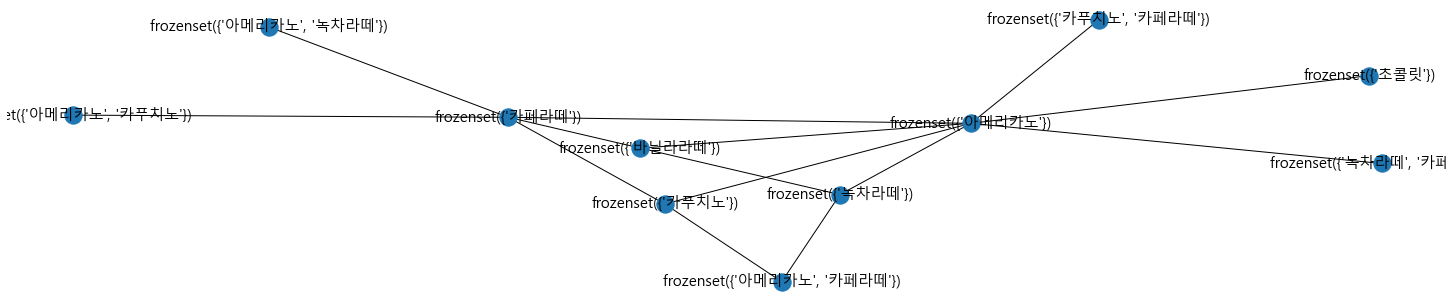

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt

ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)
